<a href="https://colab.research.google.com/github/LeHoangHoa0941/CNN_AI_6_training_image/blob/main/Nhan_dien_khuon_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
train_path = '/content/drive/MyDrive/nhan_dien_khuon_mat/train'
test_path = '/content/drive/MyDrive/nhan_dien_khuon_mat/test'

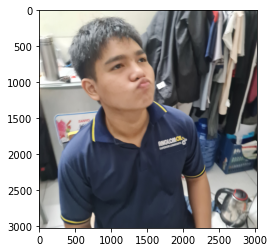

In [31]:
img = load_img('/content/drive/MyDrive/nhan_dien_khuon_mat/train/Hoa/Hoa (1).jpg')
rotated_image = img.rotate(-90)
plt.imshow(rotated_image)

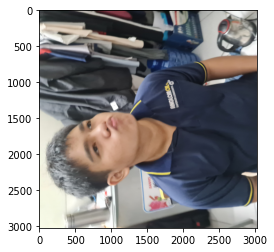

In [5]:
plt.imshow(img)

In [6]:
cv2.imread('/content/drive/MyDrive/nhan_dien_khuon_mat/train/Hoa/Hoa (1).jpg').shape

(3024, 3024, 3)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X_train = ImageDataGenerator(rescale=1/255)
X_test = ImageDataGenerator(rescale=1/255)

In [8]:
train_dataset = X_train.flow_from_directory(
    directory=r"/content/drive/MyDrive/nhan_dien_khuon_mat/train",
    target_size=(150, 150),
    batch_size=3,
    class_mode="categorical",
    )
test_dataset = X_test.flow_from_directory(
    directory=r"/content/drive/MyDrive/nhan_dien_khuon_mat/test",
    target_size=(150, 150),
    batch_size=3,
    class_mode= "categorical",
    )

Found 143 images belonging to 3 classes.
Found 53 images belonging to 3 classes.


In [9]:
train_dataset.class_indices

{'Hoa': 0, 'Huy': 1, 'Toan': 2}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [11]:
from keras.layers.pooling import MaxPooling2D
from keras.backend import conv2d
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.layers.core.flatten import Flatten

In [12]:
from keras.layers.core.flatten import Flatten
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        1

In [13]:
from tensorflow.keras.optimizers import SGD
#opt = SGD(lr = 0.01, momentum= 0.9)
model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics =['accuracy'])
history=model.fit(train_dataset,epochs=10,batch_size=64,verbose=1,validation_data= test_dataset)

Epoch 1/10
48/48 [==============================] - 102s 2s/step - loss: 0.9787 - accuracy: 0.5804 - val_loss: 0.3408 - val_accuracy: 0.9811
Epoch 2/10
48/48 [==============================] - 24s 507ms/step - loss: 0.1863 - accuracy: 0.9301 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 3/10
48/48 [==============================] - 24s 504ms/step - loss: 0.0979 - accuracy: 0.9860 - val_loss: 0.0334 - val_accuracy: 1.0000
Epoch 4/10
48/48 [==============================] - 24s 503ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 5/10
48/48 [==============================] - 24s 505ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 6/10
48/48 [==============================] - 24s 505ms/step - loss: 1.5664e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 7/10
48/48 [==============================] - 24s 500ms/step - loss: 2.1429e-04 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 

In [33]:
model.save('nhandang_mainba.h5')

In [34]:
from keras.models import load_model
model5 = load_model('nhandang_mainba.h5')

In [35]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()

In [36]:
labels = {0: 'Hoa', 1: 'Huy', 2: 'Toan'}

Day la :  Hoa


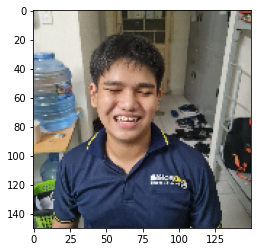

In [43]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/nhan_dien_khuon_mat/train/Hoa/Hoa (37).jpg', target_size =(150,150))
rotated_image = img.rotate(-90)
plt.imshow(rotated_image)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Day la : ', labels[np.argmax(val)])

Day la  Toan


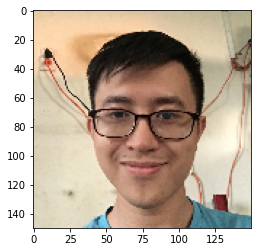

In [42]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/nhan_dien_khuon_mat/train/Toan/Toan (30).JPG', target_size =(150,150))
rotated_image = img.rotate(-90)
plt.imshow(rotated_image)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Day la ', labels[np.argmax(val)])

Day la:  Huy


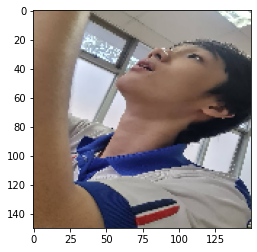

In [27]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/Huy_19146060.jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Day la: ', labels[np.argmax(val)])

Main ba:  Huy


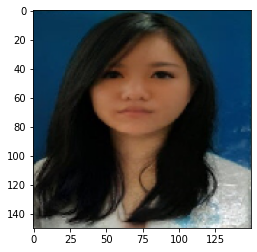

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/Hoa_girl.jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img.shape
val = model5.predict(img)
np.argmax(val,axis= 1)
print('Main ba: ', labels[np.argmax(val)])